## Capital Asset Pricing Model 

Use stock returns for Apple and S&P for 2021. 
Use CAPM equation to predict Apple's expected return based on this.
We are told that current yield for bonds is 1.72% and that stocks on S&P have an average annual excess return of 10.5%

The CAPM equation is: 

<i> ER_i = R_f + Beta_i * (ER_m - R_F)</i>

Thus we can fill in some of the figures: 

<i>ER_i = 1.72 + <b>Beta_i</b> * (10.5 - 1.72)<i/>
    
However we have no Beta_i value. Below I use LR to get this. 


In [1]:
# Import packages for ‘CAPM output for Apple stock’ example:
import statsmodels.api as sm 
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime
import time

In [3]:
# Install Pandas ‘DataReader’. 
#!pip install pandas-datareader 

# Import data from the web from ‘pandas_datareader’. 
from pandas_datareader import data as web 

In [3]:
# Set the start date.
start = datetime.datetime(2021,1,1)

# Set the end date.  
end = datetime.datetime(2022,1,1)

In [4]:
# Use the Pandas Datareader to pull data from the web
# specify the 'ticket' and the website, as well as the start and end dates.
df_spy = web.DataReader('SPY','yahoo',start,end)   

df_spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,375.450012,364.820007,375.309998,368.790009,110210800.0,361.251160
2021-01-05,372.500000,368.049988,368.100006,371.329987,66426200.0,363.739166
2021-01-06,376.980011,369.119995,369.709991,373.549988,107997700.0,365.913849
2021-01-07,379.899994,375.910004,376.100006,379.100006,68766800.0,371.350403
2021-01-08,381.489990,377.100006,380.589996,381.260010,71677200.0,373.466248


In [5]:
# Pull Apple’s stock index.
df_apple = web.DataReader('AAPL', 'yahoo', start, end)   

# Print the results.
df_apple.head()  

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.264999
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.850830
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.479858
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.761612
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.881607


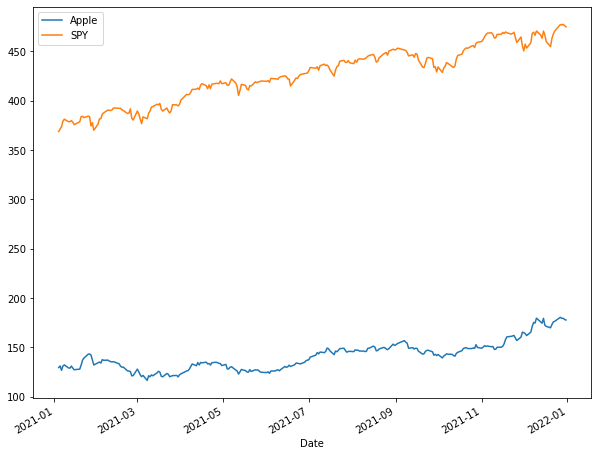

In [6]:
# Closing stock price line plot for ‘Apple’.
df_apple['Close'].plot(label = 'Apple', figsize=(10, 8))

# Closing stock price line plot for ‘SPY’.
df_spy['Close'].plot(label = 'SPY')
plt.legend()

Cumulative returns (= total earnings on an investment over a period of time)

NOTICE: we divide the close value by the first value to get the % changes. 

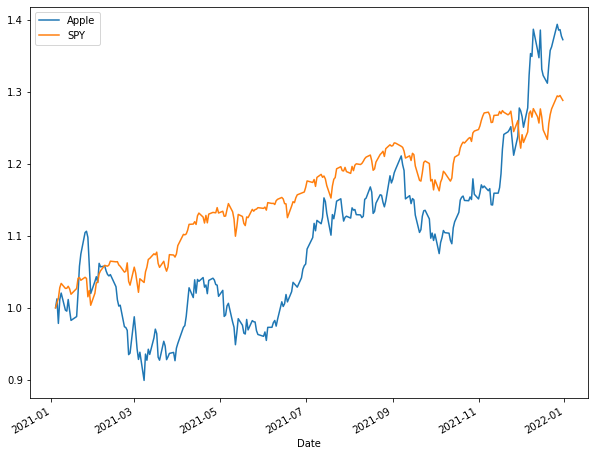

In [7]:
# Calculate the cumulative sum of closing prices for ‘Apple’ stocks 
# stores sum in a new column named 'Cumu’.
df_apple['Cumu'] = df_apple['Close']/df_apple['Close'].iloc[0]

# Calculate the cumulative sum of closing prices for ‘SPY’ stocks
# stores sum in a new column named 'Cumu’.
df_spy['Cumu'] = df_spy['Close']/df_spy['Close'].iloc[0] 

# Plot line graphs for the calculated ‘Cumu’ columns for 
# both ‘Apple’ and ‘SPY’ stocks.
df_apple['Cumu'].plot(label = 'Apple', figsize=(10,8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

Correlation between Apple and S&P in terms of daily returns using a scatterplot 

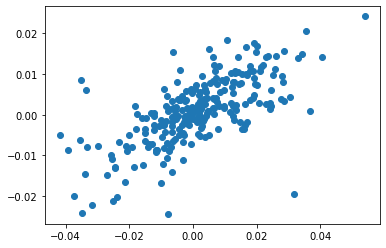

In [10]:
# Calculate daily returns and percentage change using ‘pandas pct_change()’.
df_apple['daily_ret'] = df_apple['Close'].pct_change(1) 
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)

# Plot the daily returns on a scatterplot:
plt.scatter(df_apple['daily_ret'],df_spy['daily_ret'])

ABOVE: suggests a relationship between daily change in Apple and daily change in S&P.

Notice that daily returns calcualtes the % change from the day before. Hence we get a zig-zag plot (see below) around 0. However, above we caclulate the % change from the original close value - which I suppose is why we call it 'cumulative'. 

In [11]:
df_apple.head()

,High,Low,Open,Close,Volume,Adj Close,Cumu,daily_ret
Date,,,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.264999,1.000000,NaN
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.850830,1.012364,0.012364
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.479858,0.978286,-0.033662
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.761612,1.011668,0.034123
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.881607,1.020400,0.008631


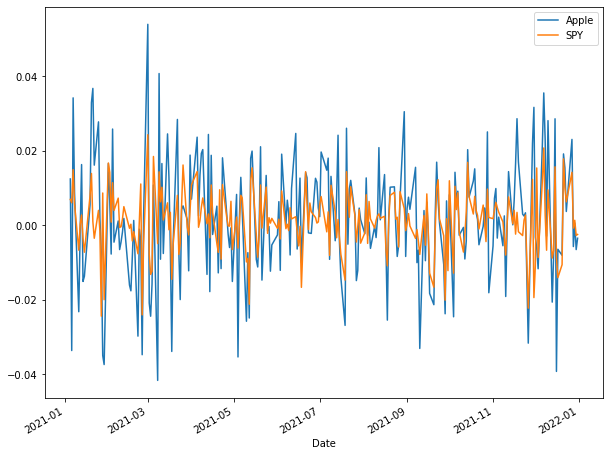

In [12]:

df_apple['daily_ret'].plot(label = 'Apple', figsize=(10,8))
df_spy['daily_ret'].plot(label = 'SPY')
plt.legend()

Concat the two dfs (df_apple and df_spy). Then create a df of percent changes. 

In [13]:
# Join the DataFrames.
daily_prices = pd.concat([df_apple['Close'], df_spy['Close']], axis=1)  
# Set column labels.
daily_prices.columns = ['Apple', 'SPY']  

# Print the new table.
print(daily_prices.head())

                 Apple         SPY
Date                              
2021-01-04  129.410004  368.790009
2021-01-05  131.009995  371.329987
2021-01-06  126.599998  373.549988
2021-01-07  130.919998  379.100006
2021-01-08  132.050003  381.260010


In [16]:
# Get the percentage change.
daily_returns = daily_prices.pct_change(1)  
# Remove the first row.
clean_daily_returns = daily_returns.dropna(axis=0)
# Print the new DataFrame.  
print(clean_daily_returns.head())

               Apple       SPY
Date                          
2021-01-05  0.012364  0.006887
2021-01-06 -0.033662  0.005979
2021-01-07  0.034123  0.014857
2021-01-08  0.008631  0.005698
2021-01-11 -0.023249 -0.006741


We will use sklearn for linear regression (rather than statsmodels OLS)

In [17]:
# Reshape ‘SPY’ data to 2D.
X = clean_daily_returns['SPY'].values.reshape(-1, 1)  
# Reshape ‘Apple’ data to 2D.
y = clean_daily_returns['Apple'].values.reshape(-1, 1)  

In [18]:
# Run the linear regression test.
lr = LinearRegression()  
# Fit the model.
lr.fit(X, y) 

LinearRegression()

In [21]:
# Check/Call the coefficient (beta value).
print(lr.coef_) 
# Check/call the intercept (c).
print(lr.intercept_) 

[[1.30313819]]
[2.68456838e-05]


We now have our beta value i.e. 1.30

Recall that the CAPM formula is 

<i> ER_i = R_f + Beta_i * (ER_m - R_F)</i>

Recall also that we supposed
1. current yield for bond is 1.72%
2. average excess annual return for stocks on S&P is 10.5%

Thus we calculate:

<b>ER_i = 1.72 + 0.35 * (10.5 - 1.72)<b/>
    
<b>ER_apple = 4.79 </b>
    
Thus, we predict a 4.79% expected return for Apple.
    
    
ER_i = 1.72 + <b>1.30</b> * (10.5 - 1.72)
    
ER_apple = <b>13.13 </b>
    

We can also draw the line of best fit (using intercept_ and coef_ values we can get from our lr model)

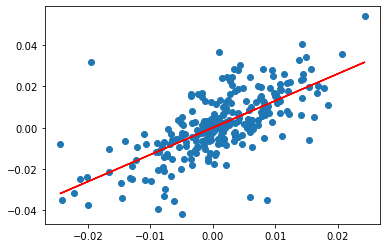

In [19]:
# Set the the x coefficient the constant (intercept)
y_pred = lr.coef_ * X + lr.intercept_

# Draw the scatterplot using Matplotlib. 
plt.scatter(X,y) 
# Plot X and predicted y as a line. Set the line colour to red.
plt.plot(X, y_pred, color='red') 